## Bool mask and bool indexing

In [3]:
import pandas as pd
import numpy as np

In [4]:
floats = pd.DataFrame(np.random.randn(7,4), columns = ["A", "B", "C", "D"])
floats

,A,B,C,D
0,1.325666,0.336415,-0.856420,0.530521
1,-0.668008,-0.687454,-0.628903,0.444748
2,0.205102,1.298384,1.182662,-0.590246
3,1.469703,-0.299388,1.830177,1.251847
4,-1.329117,-0.244623,-1.245416,-0.221781
5,0.922158,0.476685,0.181571,-0.485985
6,-1.302068,0.974128,0.152345,-1.059616


np.random.randn(7, 4) генерирует массив случайных чисел размером 7x4. Эти числа распределены по нормальному закону с математическим ожиданием 0 и стандартным отклонением 1 (так как randn генерирует случайные числа из стандартного нормального распределения). В данном случае, это создает массив 7 строк и 4 столбцов.

Нормальное распределение (или распределение Гаусса): Нормальное распределение, также известное как распределение Гаусса, является одним из наиболее распространенных распределений в статистике и вероятности. Оно имеет форму колокола, и большинство значений сконцентрированы вокруг среднего значения.

Математическое ожидание (среднее значение): В данном контексте, "математическое ожидание 0" означает, что среднее значение (средняя сумма) всех сгенерированных чисел будет равно 0. Это означает, что в среднем значения, полученные из этого распределения, будут близки к нулю.

Стандартное отклонение: "Стандартное отклонение 1" означает, что разброс или различие между сгенерированными числами будет относительно невелико. В нормальном распределении стандартное отклонение используется для измерения, насколько значения разнообразны. Значение 1 для стандартного отклонения указывает на относительно узкое распределение, где большинство значений находятся близко к среднему значению.

Сreating bool mask for column "B":

In [6]:
floats["B"] >= 0

0     True
1    False
2     True
3    False
4    False
5     True
6     True
Name: B, dtype: bool

Selecting all rows where "B" >= 0:

In [7]:
floats[floats["B"]>=0]

,A,B,C,D
0,1.325666,0.336415,-0.856420,0.530521
2,0.205102,1.298384,1.182662,-0.590246
5,0.922158,0.476685,0.181571,-0.485985
6,-1.302068,0.974128,0.152345,-1.059616


Creating a bool mask for row "0":

In [11]:
floats.loc[0, :] >= 0

A     True
B     True
C    False
D     True
Name: 0, dtype: bool

Selecting all columns where "0" >= 0:

In [9]:
floats.loc[:, floats.loc[0, :] >= 0]

,A,B,D
0,1.325666,0.336415,0.530521
1,-0.668008,-0.687454,0.444748
2,0.205102,1.298384,-0.590246
3,1.469703,-0.299388,1.251847
4,-1.329117,-0.244623,-0.221781
5,0.922158,0.476685,-0.485985
6,-1.302068,0.974128,-1.059616


## Querying data

Filtering rows based on values of certain attributes can be done either with bool index or pandas query method.

In [12]:
heroes = pd.read_excel("../TrainingData/heroes.xlsx", sheet_name = "original")
heroes.head(3)

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"


In [15]:
heroes[heroes["Unit_name"] == "CrystalDragon"]

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"


In [16]:
heroes.query("Castle == 'Neutral'")

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
3,FaerieDragon,Neutral,7,20,20,20,30,500,15,1,19580,10000,"Gem,8","Dragon,Flying,Spellcaster,MagicMirror"
41,Enchanter,Neutral,6,17,12,14,14,30,9,2,1210,750,0,"Ranged(32shots),Nomeleeandobstaclepenalty,Spel..."
47,Troll,Neutral,5,14,7,10,15,40,7,3,1024,500,0,Regeneration
55,DiamondGolem,Neutral,6,13,12,10,14,60,5,2,775,750,0,"Unliving,SpellDamageResistance+95%"
61,GoldGolem,Neutral,5,11,12,8,10,50,5,3,600,500,0,"Unliving,SpellDamageResistance+85%"
62,Sharpshooter,Neutral,4,12,10,8,10,15,9,4,585,400,0,"Ranged(32shots),Norangeandobstaclepenalty"
88,Nomad,Neutral,3,9,8,2,6,30,7,7,345,200,0,Sandwalker


In [19]:
heroes[heroes["Attack"] >= 20]

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
3,FaerieDragon,Neutral,7,20,20,20,30,500,15,1,19580,10000,"Gem,8","Dragon,Flying,Spellcaster,MagicMirror"
4,Archangel,Castle,7+,30,30,50,50,250,18,1,8776,5000,"Gem,3","Flying,HatesDevils,Resurrection,Morale+1"
5,BlackDragon,Dungeon,7+,25,25,40,50,300,15,1,8721,4000,"Sulfur,2","Dragon,Flying,Breathattack,Resistallspells,Hat..."
6,GoldDragon,Rampart,7+,27,27,40,50,250,16,1,8613,4000,"Crystal,2","Flying,Breathattack,Resistlvl1вЂ“4spells"
7,Titan,Tower,7+,24,24,40,60,300,11,1,7500,5000,"Gem,2","Ranged(24shots),Nomeleepenalty,ImmunitytoMind,..."
8,ArchDevil,Inferno,7+,26,28,30,40,200,17,1,7115,4500,"Mercury,2","Teleporting,Noenemyretaliation,Luck-1,HatesAngels"
9,Phoenix,Conflux,7+,21,18,30,40,200,21,2,6721,2000,"Mercury,1","Flying,Breathattack,Fireimmunity,Rebirth"


In [21]:
heroes.query("Attack >= 25")

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
4,Archangel,Castle,7+,30,30,50,50,250,18,1,8776,5000,"Gem,3","Flying,HatesDevils,Resurrection,Morale+1"
5,BlackDragon,Dungeon,7+,25,25,40,50,300,15,1,8721,4000,"Sulfur,2","Dragon,Flying,Breathattack,Resistallspells,Hat..."
6,GoldDragon,Rampart,7+,27,27,40,50,250,16,1,8613,4000,"Crystal,2","Flying,Breathattack,Resistlvl1вЂ“4spells"
8,ArchDevil,Inferno,7+,26,28,30,40,200,17,1,7115,4500,"Mercury,2","Teleporting,Noenemyretaliation,Luck-1,HatesAngels"


In [22]:
heroes[(heroes["Castle"] == "Neutral") & (heroes["Attack"] >= 25)]

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"


In [23]:
heroes[(heroes["Castle"] == "Neutral") | (heroes["Attack"] >= 25)]

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
3,FaerieDragon,Neutral,7,20,20,20,30,500,15,1,19580,10000,"Gem,8","Dragon,Flying,Spellcaster,MagicMirror"
4,Archangel,Castle,7+,30,30,50,50,250,18,1,8776,5000,"Gem,3","Flying,HatesDevils,Resurrection,Morale+1"
5,BlackDragon,Dungeon,7+,25,25,40,50,300,15,1,8721,4000,"Sulfur,2","Dragon,Flying,Breathattack,Resistallspells,Hat..."
6,GoldDragon,Rampart,7+,27,27,40,50,250,16,1,8613,4000,"Crystal,2","Flying,Breathattack,Resistlvl1вЂ“4spells"
8,ArchDevil,Inferno,7+,26,28,30,40,200,17,1,7115,4500,"Mercury,2","Teleporting,Noenemyretaliation,Luck-1,HatesAngels"
41,Enchanter,Neutral,6,17,12,14,14,30,9,2,1210,750,0,"Ranged(32shots),Nomeleeandobstaclepenalty,Spel..."
47,Troll,Neutral,5,14,7,10,15,40,7,3,1024,500,0,Regeneration


In [24]:
heroes.query("Castle == 'Neutral' and Attack >= 25")

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"


In [25]:
heroes.query("Castle == 'Neutral' or Attack >= 25")

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
3,FaerieDragon,Neutral,7,20,20,20,30,500,15,1,19580,10000,"Gem,8","Dragon,Flying,Spellcaster,MagicMirror"
4,Archangel,Castle,7+,30,30,50,50,250,18,1,8776,5000,"Gem,3","Flying,HatesDevils,Resurrection,Morale+1"
5,BlackDragon,Dungeon,7+,25,25,40,50,300,15,1,8721,4000,"Sulfur,2","Dragon,Flying,Breathattack,Resistallspells,Hat..."
6,GoldDragon,Rampart,7+,27,27,40,50,250,16,1,8613,4000,"Crystal,2","Flying,Breathattack,Resistlvl1вЂ“4spells"
8,ArchDevil,Inferno,7+,26,28,30,40,200,17,1,7115,4500,"Mercury,2","Teleporting,Noenemyretaliation,Luck-1,HatesAngels"
41,Enchanter,Neutral,6,17,12,14,14,30,9,2,1210,750,0,"Ranged(32shots),Nomeleeandobstaclepenalty,Spel..."
47,Troll,Neutral,5,14,7,10,15,40,7,3,1024,500,0,Regeneration


In [27]:
heroes2 = heroes.copy()
heroes2.loc[(heroes["Castle"] == "Inferno") & (heroes["Attack"] <= 10), ["Gold"]] = 0
heroes2.tail(10) 

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
131,MasterGremlin,Tower,1+,4,4,1,2,4,5,16,66,40,0,Ranged(8shots)
132,Familiar,Inferno,1+,4,4,1,2,4,7,15,60,0,0,Magicchannel
133,Goblin,Stronghold,1,4,2,1,2,5,5,15,60,40,0,-
134,Skeleton,Necropolis,1,5,4,1,3,6,4,12,60,60,0,Undead
135,Troglodyte,Dungeon,1,4,3,1,3,5,4,14,59,50,0,ImmunetoBlinding
136,Gnoll,Fortress,1,3,5,2,3,6,4,12,56,50,0,-
137,Pixie,Conflux,1,2,2,1,2,3,7,20,55,25,0,Flying
138,Imp,Inferno,1,2,3,1,2,4,5,15,50,0,0,-
139,Gremlin,Tower,1,3,3,1,2,4,4,16,44,30,0,-
140,Peasant,Neutral,1,1,1,1,1,1,3,25,15,10,0,-


In [28]:
import seaborn as sns

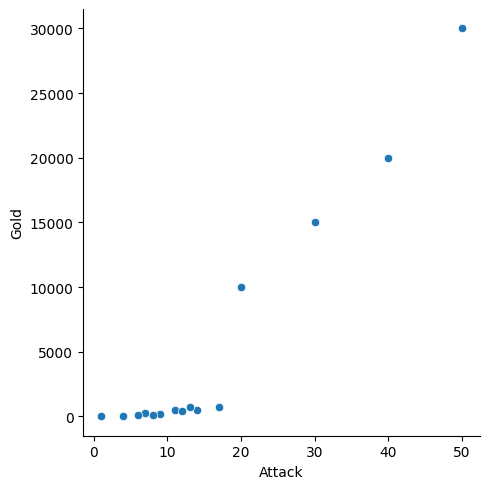

In [29]:
sns.relplot(x = "Attack", y = "Gold", data = heroes.query("Castle == 'Neutral'"))

## Sorting dataframe

Dataframes can be sorted using the .sort?values() method

Parameters:

* by Column, or list of columns
* ascending option. Default = True

In [30]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unit_name          141 non-null    object
 1   Castle             141 non-null    object
 2   Level              141 non-null    object
 3   Attack             141 non-null    int64 
 4   Defence            141 non-null    int64 
 5   Minimum Damage     141 non-null    int64 
 6   Maximum Damage     141 non-null    int64 
 7   Health             141 non-null    int64 
 8   Speed              141 non-null    int64 
 9   Growth             141 non-null    int64 
 10  AI_Value           141 non-null    int64 
 11  Gold               141 non-null    int64 
 12  Additional_item    141 non-null    object
 13  Special_abilities  141 non-null    object
dtypes: int64(9), object(5)
memory usage: 15.6+ KB


In [32]:
heroes.sort_values(by = ["Maximum Damage", "Health"], ascending = [False, False])

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
0,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1вЂ“3spells..."
1,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
7,Titan,Tower,7+,24,24,40,60,300,11,1,7500,5000,"Gem,2","Ranged(24shots),Nomeleepenalty,ImmunitytoMind,..."
19,Giant,Tower,7,19,16,40,60,150,7,1,3718,2000,"Gem,1",ImmunitytoMind
2,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Familiar,Inferno,1+,4,4,1,2,4,7,15,60,60,0,Magicchannel
138,Imp,Inferno,1,2,3,1,2,4,5,15,50,50,0,-
139,Gremlin,Tower,1,3,3,1,2,4,4,16,44,30,0,-
137,Pixie,Conflux,1,2,2,1,2,3,7,20,55,25,0,Flying
